# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | mnogovershinnyy
Processing Record 4 of Set 1 | mareeba
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | maragogi
Processing Record 7 of Set 1 | uk
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | inhambane
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | oxapampa
Processing Record 18 of Set 1 | filingue
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | san vicente
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 |

Processing Record 40 of Set 4 | meyungs
City not found. Skipping...
Processing Record 41 of Set 4 | bilibino
Processing Record 42 of Set 4 | tautira
Processing Record 43 of Set 4 | olindina
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | broadstairs
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | balakhta
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | bengkulu
Processing Record 0 of Set 5 | sandpoint
Processing Record 1 of Set 5 | sapa
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | dingle
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | qasigiannguit
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | regina
Processing Record 8 of Set 5 | datong
Processing Record 9 of Set 5 | black diamond
Processing Record 10 of Set 5 | vardo
Processing Record 11 of Set 5 | esperance
Processing Record 12 of 

Processing Record 32 of Set 8 | bow island
Processing Record 33 of Set 8 | orshanka
Processing Record 34 of Set 8 | sorong
Processing Record 35 of Set 8 | golden
Processing Record 36 of Set 8 | doha
Processing Record 37 of Set 8 | atambua
Processing Record 38 of Set 8 | la ronge
Processing Record 39 of Set 8 | lamu
Processing Record 40 of Set 8 | iralaya
Processing Record 41 of Set 8 | saint-augustin
Processing Record 42 of Set 8 | madimba
Processing Record 43 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 8 | marystown
Processing Record 45 of Set 8 | jacksonville
Processing Record 46 of Set 8 | port-gentil
Processing Record 47 of Set 8 | beidao
Processing Record 48 of Set 8 | vanimo
Processing Record 49 of Set 8 | dorogobuzh
Processing Record 0 of Set 9 | boyuibe
Processing Record 1 of Set 9 | grand-santi
Processing Record 2 of Set 9 | nanakuli
Processing Record 3 of Set 9 | sarny
Processing Record 4 of Set 9 | concordia
Processing Record 5 of Set 9 | eme

Processing Record 18 of Set 12 | tecoanapa
Processing Record 19 of Set 12 | adra
Processing Record 20 of Set 12 | port blair
Processing Record 21 of Set 12 | lincoln
Processing Record 22 of Set 12 | adre
Processing Record 23 of Set 12 | wexford
Processing Record 24 of Set 12 | garwa
Processing Record 25 of Set 12 | qaqortoq
Processing Record 26 of Set 12 | oranjemund
Processing Record 27 of Set 12 | nhulunbuy
Processing Record 28 of Set 12 | segou
Processing Record 29 of Set 12 | syriam
Processing Record 30 of Set 12 | awbari
Processing Record 31 of Set 12 | kampot
Processing Record 32 of Set 12 | falealupo
City not found. Skipping...
Processing Record 33 of Set 12 | hastings
Processing Record 34 of Set 12 | rujiena
Processing Record 35 of Set 12 | sudbury
Processing Record 36 of Set 12 | seymchan
Processing Record 37 of Set 12 | winnemucca
Processing Record 38 of Set 12 | hambantota
Processing Record 39 of Set 12 | sebastian
Processing Record 40 of Set 12 | broome
Processing Record 41

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [10]:
# Display the City Data Frame
city_data_pd.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.53,20.04,39.20,93,0,5.23,ZA,1592438527
1,tuktoyaktuk,69.45,-133.04,44.60,93,75,10.29,CA,1592438527
2,mnogovershinnyy,53.94,139.92,40.69,98,100,4.29,RU,1592438527
3,mareeba,-17.00,145.43,75.00,80,99,5.01,AU,1592438527
4,mataura,-46.19,168.86,39.00,83,4,3.00,NZ,1592438527
5,maragogi,-9.01,-35.22,75.38,81,16,8.86,BR,1592438237
6,hobart,-42.88,147.33,37.40,86,20,6.93,AU,1592438231
7,kirakira,-10.45,161.92,83.86,74,20,8.10,SB,1592438527
8,atuona,-9.80,-139.03,80.85,72,1,13.85,PF,1592438528
9,rikitea,-23.12,-134.97,75.63,80,62,15.97,PF,1592438528


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.830989,17.151166,67.685671,70.757951,48.125442,8.309753,1.592439e+09
std,33.047715,90.718867,14.189776,21.264114,37.501530,5.141994,7.706245e+01
min,-54.800000,-179.170000,28.400000,9.000000,0.000000,0.250000,1.592438e+09
25%,-8.092500,-61.522500,57.200000,60.000000,9.250000,4.470000,1.592439e+09
50%,20.995000,18.965000,69.800000,77.000000,44.000000,7.450000,1.592439e+09
75%,48.672500,97.352500,79.402500,86.750000,86.000000,11.410000,1.592439e+09
max,78.220000,178.420000,104.000000,100.000000,100.000000,25.280000,1.592439e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.53,20.04,39.20,93,0,5.23,ZA,1592438527
1,tuktoyaktuk,69.45,-133.04,44.60,93,75,10.29,CA,1592438527
2,mnogovershinnyy,53.94,139.92,40.69,98,100,4.29,RU,1592438527
3,mareeba,-17.00,145.43,75.00,80,99,5.01,AU,1592438527
4,mataura,-46.19,168.86,39.00,83,4,3.00,NZ,1592438527


In [14]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

In [26]:
html = clean_city_data.to_html(escape=True)

In [27]:
text_file = open("index.html", "w")
text_file.write(html)
text_file.close()

## Latitude vs. Temperature Plot

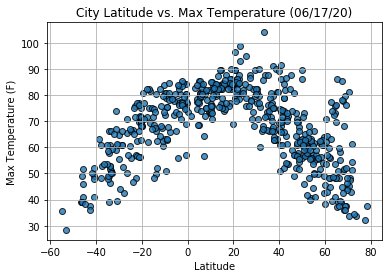

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatTemp.png")

# Show plot
plt.show()

In [16]:
#There is a trend shown here where max temperatures increase the closer the latitude gets to 0, or the equator.

## Latitude vs. Humidity Plot

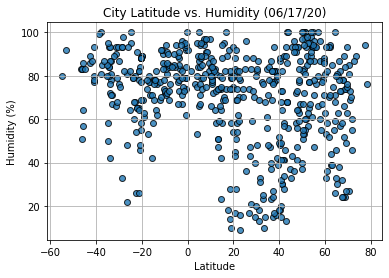

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatHumidity.png")

# Show plot
plt.show()

In [18]:
#There does not seem to be any noticeable pattern or correlation between latitude and humidity,

## Latitude vs. Cloudiness Plot

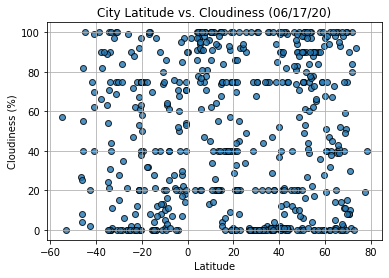

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatClouds.png")

# Show plot
plt.show()

In [20]:
#There looks to be a large amount of cities that have cloudiness percentages near 0% and 100% as shown by the lines at those y values.

## Latitude vs. Wind Speed Plot

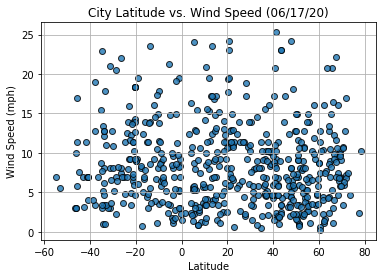

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatWind.png")

# Show plot
plt.show()

In [22]:
#There is a cluster of wind speeds near the lower levels but there does not seem to be a strong correlation between latitude and wind speeds.

## Linear Regression

In [23]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5924517288186963


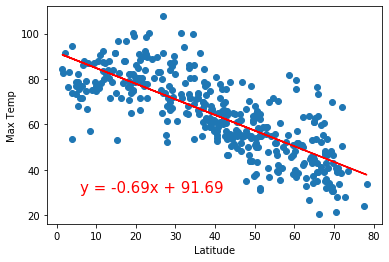

<Figure size 432x288 with 0 Axes>

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))
plt.savefig("output_data/FigtempLat.png")
plt.show()

In [55]:
#As we predicted, there is a correlation between temperatures and latitude.

The r-squared is: 0.4402164200302052


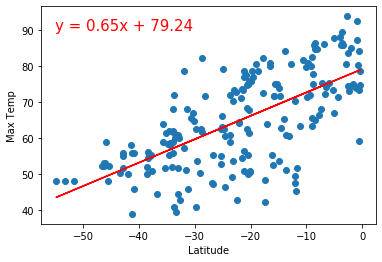

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

In [57]:
#As we predicted, there is a correlation between temperatures and latitude.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001377293014652996


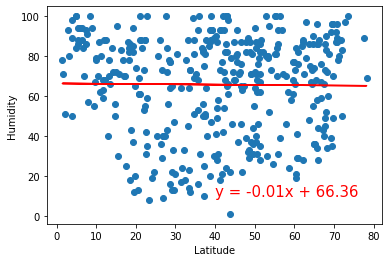

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

In [59]:
#There does not seem to be a relationship between humidity and latitude as shown by the small r-squared value and slope of the line.

The r-squared is: 0.04882673451896857


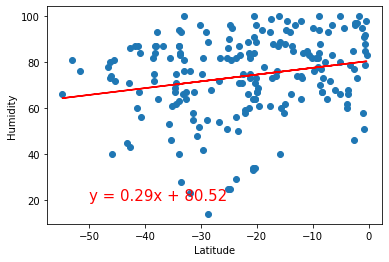

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

In [61]:
#This also indicates that there is not a relationship between humidity and latitude as shown by the small r-squared value and slope of the line.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014655753892368504


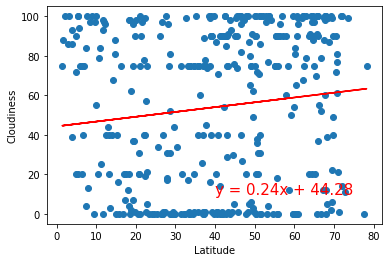

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

In [63]:
#There does not appear to be a strong correlation between cloudiness and latitude.

The r-squared is: 0.01171074652883357


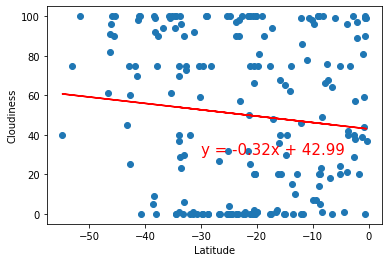

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

In [65]:
#There does not appear to be a strong correlation between cloudiness and latitude.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03917822530528826


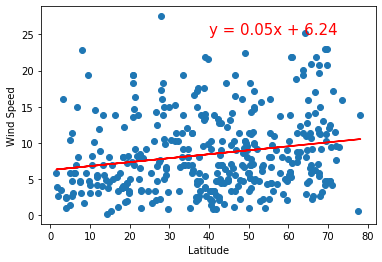

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

In [67]:
#Again, no strong correlation between wind and latitude. There is a slight increasing slope as latitude increases.

The r-squared is: 0.02775956167357865


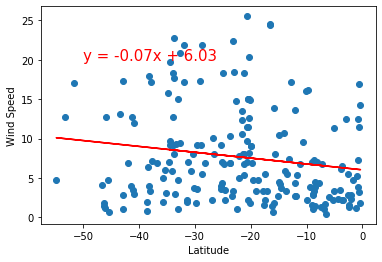

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

In [69]:
#Again, no strong correlation between wind and latitude. There is a slight decreasing slope as latitude increases.